In [1]:
import pandas as pd
from pymongo import MongoClient 
import matplotlib.pyplot as plt 

In [2]:
# Read the CSV file into a DataFrame
file_path = r"C:\Users\coope\Documents\Bootcamp\project3\biomass_energy_consump2.csv"
energy_df = pd.read_csv(file_path, thousands=',')

In [3]:
# Convert biomass energy consumption values to numeric
for col in energy_df.columns[1:]:
    energy_df[col] = pd.to_numeric(energy_df[col].replace(',', ''), errors='coerce')

In [4]:
#Create an instance of MongoClient
client = MongoClient(port=27017)

#assign the database to a variable name
db = client['energy_data']

collection = [document for document in db['biomass'].find()]
c2 = [document for document in db['hydro'].find()]
c3 = [document for document in db['wind'].find()]
c4 = [document for document in db['geothermal'].find()]


In [5]:
#confirm database was created
print(client.list_database_names())

['admin', 'classDB', 'config', 'energy_data', 'local', 'petsitly_marketing', 'travel_db', 'uk_food']


In [6]:
#review the collections in database
print(db.list_collection_names())

['renewables', 'hydro', 'geothermal', 'wind', 'solar', 'biomass']


In [7]:
#assign the collection to variable
renewables = db['renewables']

In [8]:
collection

[{'_id': ObjectId('65b85d6fc7a6adfc90c2ea96'),
  'State': 'AK',
  '2000': '2,069',
  '2001': '3,445',
  '2002': '3,540',
  '2003': '3,494',
  '2004': '3,783',
  '2005': '1,197',
  '2006': '1,249',
  '2007': '1,426',
  '2008': '1,447',
  '2009': '2,770',
  '2010': '2,888',
  '2011': '3,299',
  '2012': '2,298',
  '2013': '3,660',
  '2014': '6,494',
  '2015': '7,530',
  '2016': '9,181',
  '2017': '7,802',
  '2018': '8,231',
  '2019': '7,668',
  '2020': '8,687',
  '2021': '8,503'},
 {'_id': ObjectId('65b85d6fc7a6adfc90c2ea97'),
  'State': 'AL',
  '2000': '203,782',
  '2001': '166,334',
  '2002': '163,686',
  '2003': '156,371',
  '2004': '186,726',
  '2005': '178,417',
  '2006': '194,853',
  '2007': '188,449',
  '2008': '177,209',
  '2009': '151,859',
  '2010': '181,015',
  '2011': '193,453',
  '2012': '194,992',
  '2013': '213,553',
  '2014': '203,628',
  '2015': '192,270',
  '2016': '194,485',
  '2017': '198,072',
  '2018': '196,226',
  '2019': '193,284',
  '2020': '187,599',
  '2021': '1

In [9]:
df = pd.DataFrame(collection)
df = df.drop(columns=['_id'])
df.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,"2,069","3,445","3,540","3,494","3,783","1,197","1,249","1,426","1,447",...,"2,298","3,660","6,494","7,530","9,181","7,802","8,231","7,668","8,687","8,503"
1,AL,"203,782","166,334","163,686","156,371","186,726","178,417","194,853","188,449","177,209",...,"194,992","213,553","203,628","192,270","194,485","198,072","196,226","193,284","187,599","196,574"
2,AR,"83,466","66,837","72,972","80,406","75,933","81,477","84,758","89,239","79,760",...,"103,550","106,124","105,604","95,088","93,707","93,283","94,536","92,332","74,385","72,036"
3,AZ,"13,376","10,389","9,319","9,573","9,704","25,335","25,421","29,420","36,719",...,"27,209","27,187","33,300","35,397","37,709","37,953","40,107","40,871","35,235","37,237"
4,CO,"16,364","13,734","12,544","13,788","14,174","12,834","15,042","19,828","24,008",...,"32,766","36,671","37,476","41,942","44,116","44,071","44,599","47,803","41,829","42,466"


In [10]:
for year in range(2000, 2022):
    column_name = str(year)
    df[column_name] = df[column_name].str.replace(',', '').fillna('0').astype(int)


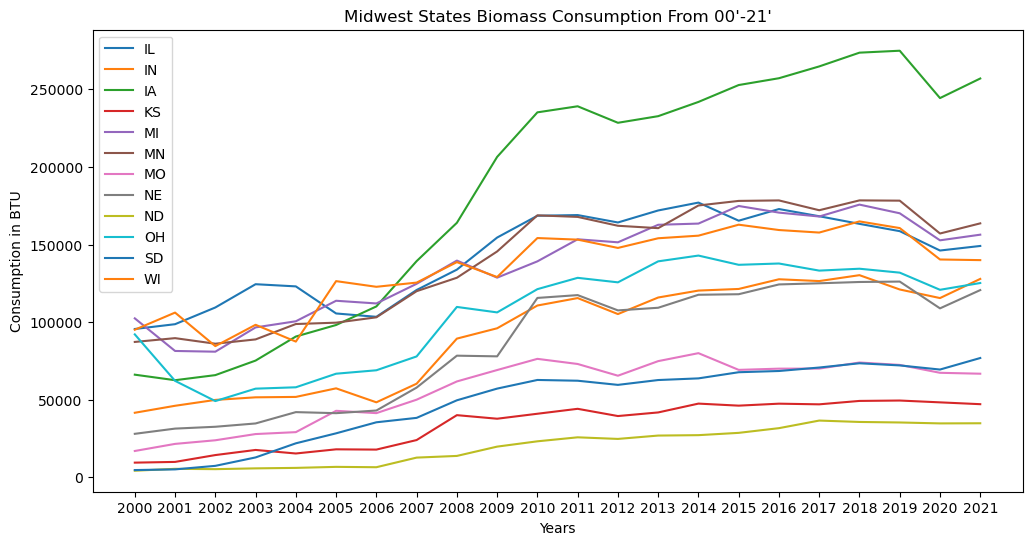

In [15]:
df_long = df.melt(id_vars=['State'], var_name='Year', value_name='Value')

df_filtered = df_long[df_long['State'].isin([  
    'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI'])]

df_filtered = df_filtered[df_filtered['Year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

plt.figure(figsize=(12, 6))
for state in [ 'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI']:
    state_data = df_filtered[df_filtered['State'] == state]
    plt.plot(state_data['Year'], state_data['Value'], label=state)
    plt.title("Midwest States Biomass Consumption From 00'-21'")
    plt.xlabel("Years")
    plt.ylabel("Consumption in BTU")
plt.legend()

Hydro energy code

In [17]:
c2

[{'_id': ObjectId('65b85dafb160f313e2a53aae'),
  'State': 'AK',
  '2000': '10,220',
  '2001': '13,905',
  '2002': '14,643',
  '2003': '16,023',
  '2004': '15,004',
  '2005': '14,638',
  '2006': '12,137',
  '2007': '12,762',
  '2008': '11,547',
  '2009': '12,920',
  '2010': '13,982',
  '2011': '13,066',
  '2012': '14,988',
  '2013': '13,696',
  '2014': '14,632',
  '2015': '14,613',
  '2016': '15,311',
  '2017': '15,135',
  '2018': '15,141',
  '2019': '14,446',
  '2020': '15,465',
  '2021': '14,937'},
 {'_id': ObjectId('65b85dafb160f313e2a53aaf'),
  'State': 'AL',
  '2000': '59,346',
  '2001': '86,346',
  '2002': '89,775',
  '2003': '128,232',
  '2004': '106,432',
  '2005': '101,436',
  '2006': '71,930',
  '2007': '40,881',
  '2008': '60,466',
  '2009': '122,345',
  '2010': '84,919',
  '2011': '86,313',
  '2012': '70,754',
  '2013': '123,071',
  '2014': '90,020',
  '2015': '91,853',
  '2016': '64,456',
  '2017': '85,057',
  '2018': '101,380',
  '2019': '101,495',
  '2020': '117,032',
  '

In [18]:
df = pd.DataFrame(c2)
df = df.drop(columns=['_id'])
df.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,"10,220","13,905","14,643","16,023","15,004","14,638","12,137","12,762","11,547",...,"14,988","13,696","14,632","14,613","15,311","15,135","15,141","14,446","15,465","14,937"
1,AL,"59,346","86,346","89,775","128,232","106,432","101,436","71,930","40,881","60,466",...,"70,754","123,071","90,020","91,853","64,456","85,057","101,380","101,495","117,032","101,890"
2,FL,885,"1,526","1,873","2,660","2,657","2,661","2,018","1,527","2,031",...,"1,432","2,425","2,010","2,275","1,611","2,010","2,116","1,868","2,031","2,225"
3,GA,"25,307","26,829","27,627","41,920","36,983","40,317","25,480","22,102","21,133",...,"21,281","35,431","29,139","27,789","31,123","22,189","33,634","35,206","40,877","32,378"
4,HI,"1,055","1,041",967,916,941,962,"1,191",913,831,...,"1,090",747,895,"1,129",838,608,878,841,866,"1,017"


In [19]:
for year in range(2000, 2022):
    column_name = str(year)
    df[column_name] = df[column_name].str.replace(',', '').fillna('0').astype(int)

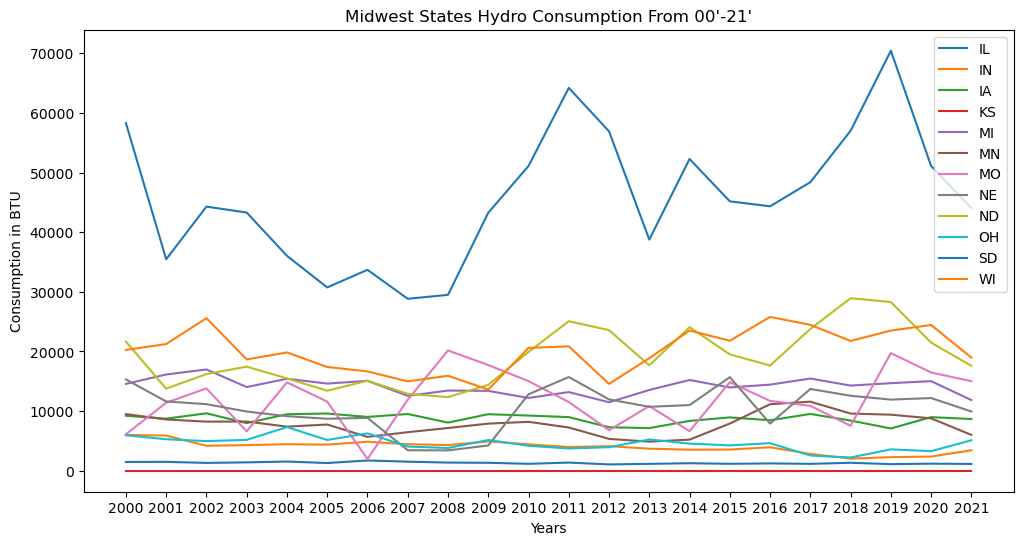

In [21]:
df_long = df.melt(id_vars=['State'], var_name='Year', value_name='Value')

df_filtered = df_long[df_long['State'].isin([  
    'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI'])]

df_filtered = df_filtered[df_filtered['Year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

plt.figure(figsize=(12, 6))
for state in [ 'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI']:
    state_data = df_filtered[df_filtered['State'] == state]
    plt.plot(state_data['Year'], state_data['Value'], label=state)
    plt.title("Midwest States Hydro Consumption From 00'-21'")
    plt.xlabel("Years")
    plt.ylabel("Consumption in BTU")
plt.legend()

Wind energy code

In [24]:
c3

[{'_id': ObjectId('65b85de512bb63bc03d51a09'),
  'State': 'AR',
  '2000': 0,
  '2001': 0,
  '2002': 0,
  '2003': 0,
  '2004': 0,
  '2005': 0,
  '2006': 0,
  '2007': 0,
  '2008': 0,
  '2009': 0,
  '2010': 0,
  '2011': 0,
  '2012': 0,
  '2013': 0,
  '2014': 0,
  '2015': 0,
  '2016': 0,
  '2017': 0,
  '2018': 0,
  '2019': 0,
  '2020': 0,
  '2021': 0},
 {'_id': ObjectId('65b85de512bb63bc03d51a0a'),
  'State': 'AL',
  '2000': 0,
  '2001': 0,
  '2002': 0,
  '2003': 0,
  '2004': 0,
  '2005': 0,
  '2006': 0,
  '2007': 0,
  '2008': 0,
  '2009': 0,
  '2010': 0,
  '2011': 0,
  '2012': 0,
  '2013': 0,
  '2014': 0,
  '2015': 0,
  '2016': 0,
  '2017': 0,
  '2018': 0,
  '2019': 0,
  '2020': 0,
  '2021': 0},
 {'_id': ObjectId('65b85de512bb63bc03d51a0b'),
  'State': 'AK',
  '2000': 0,
  '2001': 10,
  '2002': 0,
  '2003': 0,
  '2004': 0,
  '2005': 6,
  '2006': 8,
  '2007': 10,
  '2008': 1,
  '2009': 69,
  '2010': 123,
  '2011': 121,
  '2012': 356,
  '2013': '1,386',
  '2014': '1,445',
  '2015': '1,487',

In [25]:
df = pd.DataFrame(c3)
df = df.drop(columns=['_id'])
df.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,0,10,0,0,0,6,8,10,1,...,356,"1,386","1,445","1,487","1,562","1,305","1,410","1,269","1,127","1,169"
3,AZ,0,0,0,0,0,0,0,0,0,...,"5,059","4,291","4,451","4,210","4,998","5,248","4,824","4,933","5,647","14,153"
4,CA,"35,887","36,163","38,684","39,441","43,128","42,618","48,433","55,201","53,063",...,"92,821","122,335","123,546","113,906","124,661","118,074","127,590","122,228","119,083","134,225"


In [26]:
for year in range(2000, 2022):
    column_name = str(year)
    df[column_name] = df[column_name].str.replace(',', '').fillna('0').astype(int)

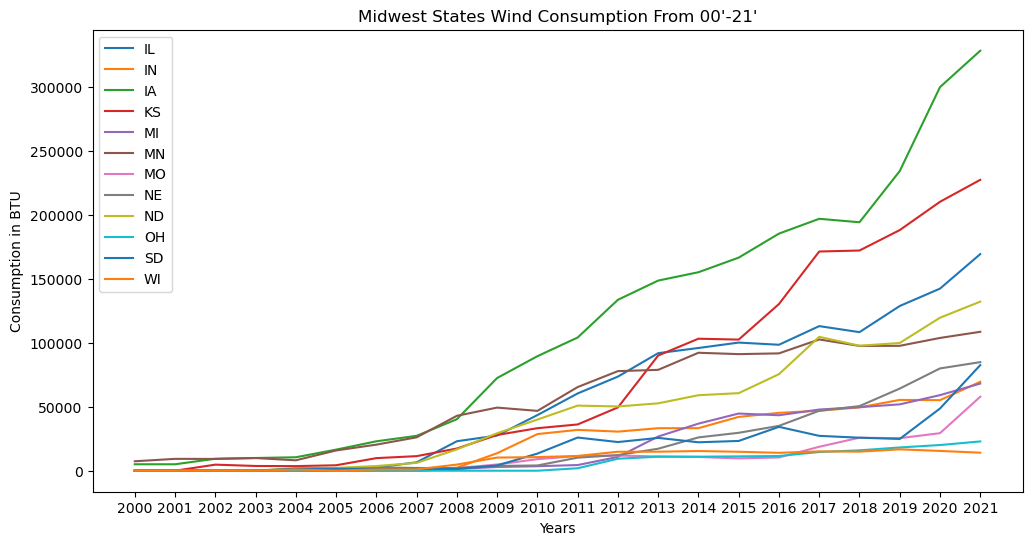

In [27]:
df_long = df.melt(id_vars=['State'], var_name='Year', value_name='Value')

df_filtered = df_long[df_long['State'].isin([  
    'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI'])]

df_filtered = df_filtered[df_filtered['Year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

plt.figure(figsize=(12, 6))
for state in [ 'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI']:
    state_data = df_filtered[df_filtered['State'] == state]
    plt.plot(state_data['Year'], state_data['Value'], label=state)
    plt.title("Midwest States Wind Consumption From 00'-21'")
    plt.xlabel("Years")
    plt.ylabel("Consumption in BTU")
plt.legend()

Geothermal Energy

In [31]:
df = pd.DataFrame(c4)
df = df.drop(columns=['_id'])
df.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,86,86,86,89,88,90,87,87,130,...,186,186,186,186,186,186,186,186,186,186
1,CA,"127,600","128,077","135,221","133,310","133,248","132,375","129,319","130,592","129,143",...,"121,269","119,556","117,214","112,818","107,867","108,579","108,375","99,263","101,789","100,551"
2,CO,578,579,582,538,562,605,603,621,702,...,759,759,759,759,759,759,759,759,759,759
3,CT,5,5,5,7,7,8,9,11,14,...,21,21,21,21,21,21,21,21,21,21
4,DC,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22


In [32]:
for year in range(2000, 2022):
    column_name = str(year)
    df[column_name] = df[column_name].str.replace(',', '').fillna('0').astype(int)

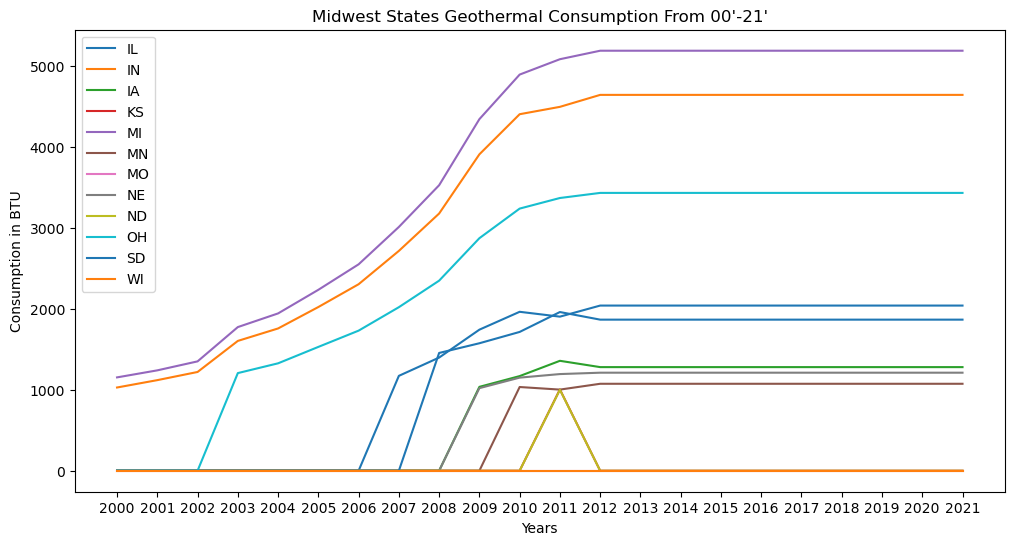

In [33]:
df_long = df.melt(id_vars=['State'], var_name='Year', value_name='Value')

df_filtered = df_long[df_long['State'].isin([  
    'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI'])]

df_filtered = df_filtered[df_filtered['Year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

plt.figure(figsize=(12, 6))
for state in [ 'IL',
    'IN',
    'IA',
    'KS',
    'MI',
    'MN',
    'MO',
    'NE',
    'ND',
    'OH',
    'SD',
    'WI']:
    state_data = df_filtered[df_filtered['State'] == state]
    plt.plot(state_data['Year'], state_data['Value'], label=state)
    plt.title("Midwest States Geothermal Consumption From 00'-21'")
    plt.xlabel("Years")
    plt.ylabel("Consumption in BTU")
plt.legend()